# Data Preprocessing

In [63]:
from tensorflow.python.keras.utils.np_utils import to_categorical
import numpy as np
np.random.seed(10)

from  keras.datasets import mnist
(x_train_image, y_train_label),\
(x_test_image, y_test_label) = mnist.load_data()

使用reshape轉換 取得feature(784個float數字)    
忘記shape用途可以看: https://blog.csdn.net/u010758410/article/details/71554224  
reshape: https://steam.oxxostudio.tw/category/python/numpy/array-shape.html  
`reshape()` 可以將現有的陣列，轉換為特定維度的陣列，使用時必須注意特定維度的項目總數，要和原本的陣列相同，下方的例子會將一個一維陣列，轉換成 4x2 以及 2x4 的陣列。

In [64]:
x_train = x_train_image.reshape(60000, 784).astype('float32') # matrix = 60,000 * 784
x_test = x_test_image.reshape(10000, 784).astype('float32')

## standardize

In [65]:
x_train_normalize = x_train/255
x_test_normalize = x_test/255

## One-hot encoding
 - Label encoding:把每個類別mapping到某個整數 不會增加新欄位  
 - One hot encoding:為每個類別新增一個欄位 用0/1表示是否  
詳細看:[資料前處理( Label encoding、 One hot encoding)](https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87)


In [66]:
y_train_onehot = to_categorical(y_train_label)
y_test_onehot = to_categorical(y_test_label)

# Build model

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(
    Dense(
        units = 256,
        input_dim = 784, #28 * 28
        kernel_initializer = 'normal',
        activation = 'relu'
    )
)
model.add(
    Dense(
        units = 10, #0~9
        kernel_initializer = 'normal',
        activation = 'softmax'
    )
)
model.summary()

d:\Program\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [68]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

train_history = model.fit(
    x = x_train_normalize,
    y = y_train_onehot,
    validation_split = 0.2,
    epochs = 10,
    batch_size = 200,
    verbose = 2
)

Epoch 1/10
240/240 - 2s - 8ms/step - accuracy: 0.8846 - loss: 0.4308 - val_accuracy: 0.9422 - val_loss: 0.2147
Epoch 2/10
240/240 - 1s - 2ms/step - accuracy: 0.9464 - loss: 0.1871 - val_accuracy: 0.9557 - val_loss: 0.1571
Epoch 3/10
240/240 - 1s - 2ms/step - accuracy: 0.9620 - loss: 0.1323 - val_accuracy: 0.9607 - val_loss: 0.1317
Epoch 4/10
240/240 - 1s - 2ms/step - accuracy: 0.9713 - loss: 0.1022 - val_accuracy: 0.9674 - val_loss: 0.1106
Epoch 5/10
240/240 - 1s - 2ms/step - accuracy: 0.9767 - loss: 0.0812 - val_accuracy: 0.9703 - val_loss: 0.1006
Epoch 6/10
240/240 - 1s - 2ms/step - accuracy: 0.9812 - loss: 0.0668 - val_accuracy: 0.9706 - val_loss: 0.0937
Epoch 7/10
240/240 - 1s - 3ms/step - accuracy: 0.9853 - loss: 0.0541 - val_accuracy: 0.9728 - val_loss: 0.0889
Epoch 8/10
240/240 - 1s - 3ms/step - accuracy: 0.9874 - loss: 0.0453 - val_accuracy: 0.9747 - val_loss: 0.0840
Epoch 9/10
240/240 - 1s - 2ms/step - accuracy: 0.9902 - loss: 0.0379 - val_accuracy: 0.9752 - val_loss: 0.0823
E

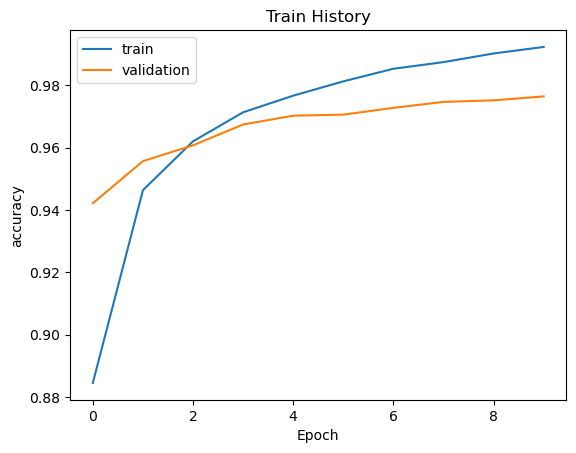

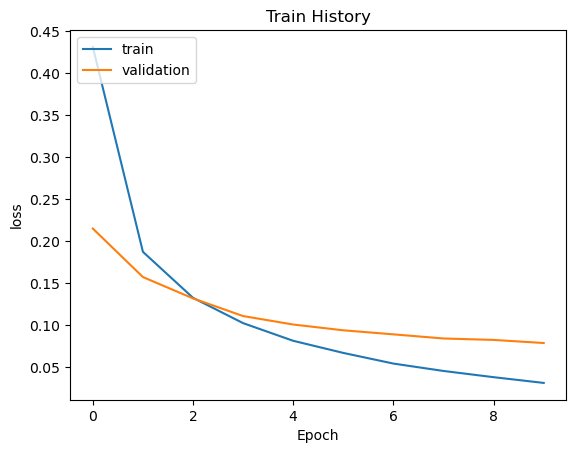

In [69]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()
show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

# Evaluation Model

In [70]:
scores = model.evaluate(x_test_normalize, y_test_onehot)
print()
print('accuracy = ', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.9753 - loss: 0.0805

accuracy =  0.9778000116348267


# np.argmax()

model.predict()return的是連續值(機率值) 而不是類別標籤 所以用來生成測試集上的預測結果會出錯   
可以先將連續值轉換為類別標籤 然後再建立Confusion matrix  
使用`np.argmax()`取得連續值中最大值預測的類別標籤  

# Reference
[通俗易懂的np.argmax()函數分析](https://blog.csdn.net/weixin_42755982/article/details/104542538)  
[np.argmax()輸出](https://blog.csdn.net/xh929175050/article/details/79411941)  

In [75]:
prediction = model.predict(x_test)
predicted_labels = np.argmax(prediction, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step


# Debug
原本`prediction`帶入`plot_images_labels_prediction()`後在prediciton的部分顯示的是matrix

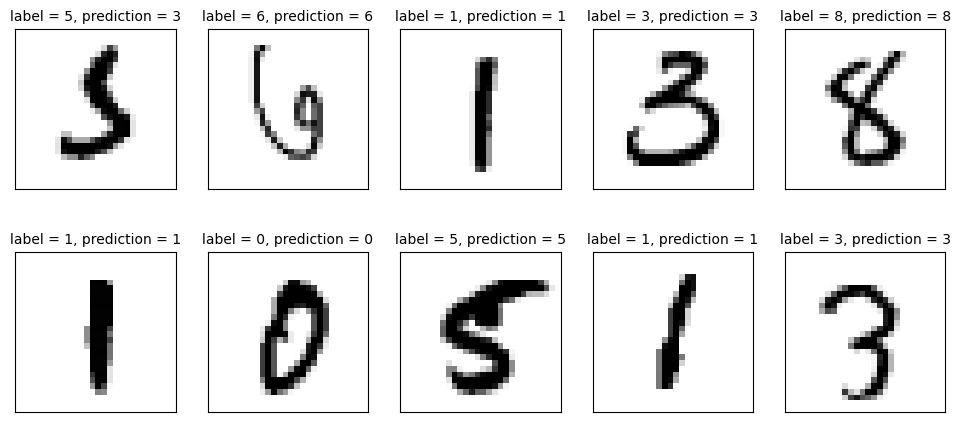

In [85]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)

    if num>25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap = 'binary')
        title = "label = " + str(labels[idx])
        if len(prediction)>0:
            title += ", prediction = " + str(prediction[idx])
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

plot_images_labels_prediction(x_test_image, y_test_label, predicted_labels, idx = 340)

# Confusion matrix
`ValueError: operands could not be broadcast together with shapes (1,10000) (10000,10)`   
如果兩個組數的shape不同的話 會進行broadcasting處理:
 - 1.讓所有輸入都像其中shape最長的數組看齊 shape不足的部分在前面加1補齊  
 - 2.輸出的shape是輸入shape的各個軸上的最大值
 - 3.如果輸入的某個軸和輸出的對應軸長度相同或其長度為1 這個數組可以用來計算 否則出錯
 - 4.當輸入的某個軸長度為1時 沿著此軸運算時都用此軸上的第一組值

# Reference
[operands could not be broadcast together with shapes](https://blog.csdn.net/qq_18433441/article/details/56834207)  
[理解Numpy 擴張機制](https://openhome.cc/Gossip/DCHardWay/Broadcasting.html)  


In [76]:
import pandas as pd
confusion_matrix = pd.crosstab(y_test_label, predicted_labels, rownames=['label'], colnames=['predict'])
print(confusion_matrix)

predict    0     1     2    3    4    5    6    7    8    9
label                                                      
0        974     0     0    1    1    0    1    1    1    1
1          0  1127     3    0    0    1    2    0    2    0
2          7     2  1003    3    4    0    4    6    3    0
3          0     0     2  998    0    1    0    2    4    3
4          2     0     2    1  962    0    3    1    2    9
5          4     0     0   12    1  860    7    1    4    3
6          9     3     1    1    2    2  938    0    2    0
7          1     6    11    6    0    0    0  999    0    5
8          4     0     5   10    5    4    3    3  938    2
9          5     4     0    8    8    1    0    6    2  975


# ValueError: Per-column arrays must each be 1-dimensional
`prediction`是一個numpy array 而不是一個list 所以無法直接跟`y_test_label`合併  

In [82]:
df = pd.DataFrame({'label': y_test_label, 'predict': predicted_labels})
df[:2]

,label,predict
0,7,7
1,2,2


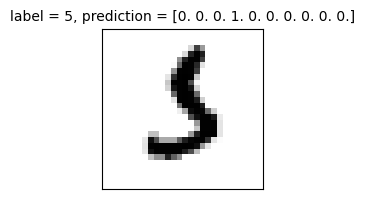

In [ ]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx = 340, num=1)

In [83]:
df[(df.label == 5) & (df.predict == 3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
3702,5,3
3902,5,3
4271,5,3
4355,5,3
5937,5,3
5972,5,3


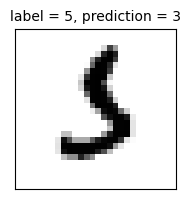

In [84]:
plot_images_labels_prediction(x_test_image, y_test_label, predicted_labels, idx = 340, num = 1)